<h2> Linear Regression on Boston dataset </h2>

In [0]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.datasets import load_boston
from random import seed
from random import randrange
from csv import reader
from math import sqrt
from sklearn import preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from sklearn.linear_model import SGDRegressor
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
#Performing Linear Regression on Boston Dataset
Data = load_boston()
X = Data.data
Y = Data.target
print("The Shape of data is :",X.shape)
print("The Shape of target varibale is :",Y.shape)

The Shape of data is : (506, 13)
The Shape of target varibale is : (506,)


In [3]:
#Describe the features in data
print(Data.feature_names)
print(Data.DESCR)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial hig

In [0]:
#Converting into Data Frame
X_data = pd.DataFrame(X)
Y_data = np.array(pd.DataFrame(Y))

In [0]:
#Dividing the data into train and test
X_train, X_test, Y_train, Y_test = train_test_split( X_data,Y_data,test_size=0.3)

In [8]:
#Performing the standardisation on train and test data
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_sc = scaler.transform(X_train)
X_test_sc=scaler.transform(X_test)
print("The shape of train data after standardisation is :",X_train_sc.shape)
print("The shape of test data after standardisation is :",X_test_sc.shape)

The shape of train data after standardisation is : (354, 13)
The shape of test data after standardisation is : (152, 13)


<h3> Apply Linear Regression using SKlearn </h3>

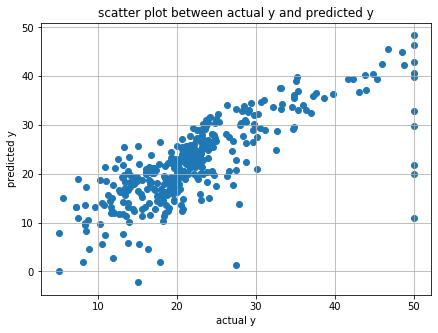

In [10]:
#Applying SGDRegressor on data set with alpha value as 0.08 and lerning rate as 'optimal'
clf = SGDRegressor(loss='squared_loss',alpha=0.8,penalty=None, learning_rate='optimal')
clf.fit(X_train_sc,Y_train)

plt.figure(figsize=(7,5))
plt.scatter(Y_train, clf.predict(X_train_sc))
#plt.ylim((0,50))
plt.title('scatter plot between actual y and predicted y')
plt.xlabel('actual y')
plt.ylabel('predicted y')
plt.grid()
plt.show()

In [11]:
#print the weight and intercept term of SGDRegressor
print("Weight Vector is :",clf.coef_)
print("Intercept term is :",clf.intercept_)

Weight Vector is : [-2.1862974   0.3185696   0.02726103  0.78988184 -1.30739987  5.05864291
 -4.78503287 -4.44727969  5.39779227 -4.13644723 -1.93486646  1.70663967
  0.92305881]
Intercept term is : [22.22605672]


In [12]:
#Mean squared error of train and test data
MSE_sklearn_train = mean_squared_error(Y_train,clf.predict(X_train_sc))
MSE_sklearn_test = mean_squared_error(Y_test,clf.predict(X_test_sc))
print("The mean squared error of train data with the help of Sklearn is :",MSE_sklearn_train)
print("The mean squared error of test data with the help of Sklearn is :",MSE_sklearn_test)

The mean squared error of train data with the help of Sklearn is : 34.01708233682353
The mean squared error of test data with the help of Sklearn is : 38.89317709023197


<h3>Manual Implementation of SGD:</h3>

In [0]:
#Implementation of SGD 
def SGDman(X,Y,sample_size,lr,n_epoc):
    #assigning the weight vector withe shape of features and assign it with zero
    W_new=np.zeros(13)
    b_new=0
    #'t' is for epoch                
    t=0 

    while(t<=n_epoc):
        W_old=W_new
        b_old=b_new
        x_len=np.size(X,0)
        idx = np.random.randint(x_len, size=sample_size)
        x_sample=X[idx]        
        y_sample=Y[idx]                
        W_grad=np.zeros(13)
        b_=0   

        for i in range(sample_size):
            #Predicted y with the help of W and b 
            y_hat=np.asscalar(b_old+np.dot(W_old,x_sample[i]))
            error=y_sample.item(i,0)-y_hat          
            W_grad=W_grad+np.multiply(x_sample[i],error)              
            b_=b_+error      

        W_new=np.subtract(W_old,-2*lr*W_grad)        
        b_new=np.subtract(b_old,-2*lr*b_)
        
        #If w_old and w_new is eqaual then terminate the loop
        if(W_old==W_new).all():
            break
        t+=1        
    return W_new,b_new,n_epoc

In [0]:
#Predict function with the optimal W and b
def pred(x,w,b):
  y_pred = []
  for i in range(len(x)):
    y = np.asscalar(np.dot(w,x[i])+b)
    y_pred.append(y)
  return y_pred

In [16]:
sample_size=10
#n_epoc=100
mse = []
r = [0.0001,0.001,0.01]
for i in r:
  W_train,b_train,n_iter_train=SGDman(X_train_sc,Y_train,sample_size,lr=i,n_epoc=10000)
  y_pred_train=pred(X_train_sc,W_train,b_train)
  #np.all(np.isfinite(y_pred_train))
  mse_error = mean_squared_error(Y_train,y_pred_train)
  #mse_error=np.around(mse_error,4)
  mse.append(mse_error)
low_mse = np.argmin(mse)
optimal_lr_rate = r[low_mse]
print("optimal learning rate :",optimal_lr_rate)

optimal learning rate : 0.0001


In [20]:
#Finding the Train data Mean Squared Error
W_train,b_train,n_iter_train=SGDman(X_train_sc,Y_train,sample_size,lr=0.0001,n_epoc=10000)
y_pred_train=pred(X_train_sc,W_train,b_train)
train_MSE=mean_squared_error(Y_train,y_pred_train)
print("Train Mean Squared Error is",train_MSE)

Train Mean Squared Error is 21.895655376591694


In [21]:
#Finding the Test data Mean Squared Error
W_test,b_test,n_iter_train=SGDman(X_test_sc,Y_test,sample_size,lr=0.0001,n_epoc=10000)
y_pred_test=pred(X_test_sc,W_test,b_test)
test_MSE=mean_squared_error(Y_test,y_pred_test)
print("Test Mean Squared Error is",test_MSE)

Test Mean Squared Error is 21.094311152310766


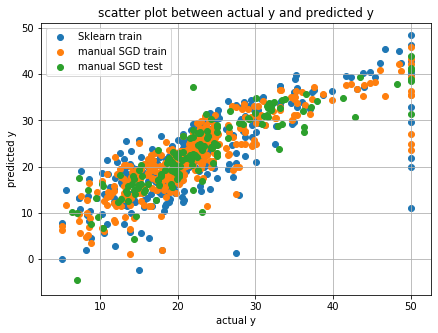

In [22]:
#Plot the Train and test data with SGD Implementation function
plt.figure(figsize=(7,5))
plt.scatter(Y_train, clf.predict(X_train_sc), label='Sklearn train')
plt.scatter(Y_train, y_pred_train,label='manual SGD train')
plt.scatter(Y_test, y_pred_test,label='manual SGD test')
#plt.ylim((0,50))
plt.title('scatter plot between actual y and predicted y')
plt.xlabel('actual y')
plt.ylabel('predicted y')
plt.legend()
plt.grid()
plt.show()

In [24]:
#Display the results in pretty table
from prettytable import PrettyTable
x = PrettyTable()
x.field_names = ["Implementation Method","Learning rate","Train_Mean_Squared_Error","Test_Mean_Squared_Error"]
x.add_row(["Sklearn SGDRegressor","optimal",MSE_sklearn_train,MSE_sklearn_test])
x.add_row(["SGD Implementation",optimal_lr_rate,train_MSE,test_MSE])
print(x)

+-----------------------+---------------+--------------------------+-------------------------+
| Implementation Method | Learning rate | Train_Mean_Squared_Error | Test_Mean_Squared_Error |
+-----------------------+---------------+--------------------------+-------------------------+
|  Sklearn SGDRegressor |    optimal    |    34.01708233682353     |    38.89317709023197    |
|   SGD Implementation  |     0.0001    |    21.895655376591694    |    21.094311152310766   |
+-----------------------+---------------+--------------------------+-------------------------+


From this we can clearly observed that, with the help of SGD the mean squared error for train and test got reduced by 39%. 